In [1]:
import tensorflow as tf
import os


In [2]:
import cv2
import imghdr
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [7]:
platypus_tr = []
for file_path in glob.glob('archive (5)/Scarlett Johansson/*'):
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    platypus_tr.append(gray_image)

perry_tr = []
for file_path in glob.glob('archive (5)/Robert Downey Jr/*'):
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    perry_tr.append(gray_image)


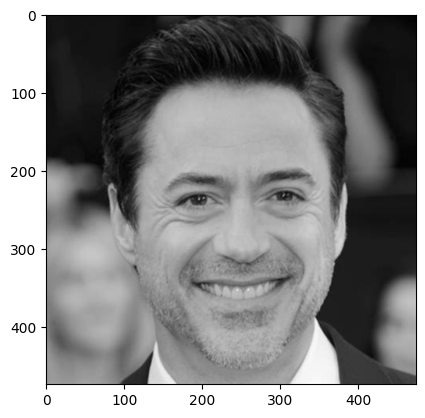

In [9]:
plt.imshow(cv2.cvtColor(perry_tr[9],cv2.COLOR_BGR2RGB))

In [10]:
perry_labeled = [(image, 'perry') for image in perry_tr]
platypus_labeled = [(image, 'platypus') for image in platypus_tr]

In [11]:
import random
combined_data = perry_labeled + platypus_labeled
random.shuffle(combined_data)

In [12]:
combined_data

[(array([[ 38,  38,  38, ...,  39,  37,  37],
         [ 38,  38,  38, ...,  39,  37,  37],
         [ 37,  37,  37, ...,  39,  37,  37],
         ...,
         [203, 202, 200, ...,  62,  62,  62],
         [199, 206, 207, ...,  63,  65,  85],
         [199, 206, 207, ...,  63,  65,  85]], dtype=uint8),
  'platypus'),
 (array([[ 9,  7, 11, ..., 20, 19, 19],
         [ 8,  6, 10, ..., 17, 18, 18],
         [ 7,  6,  9, ..., 15, 18, 18],
         ...,
         [15,  2, 16, ...,  3,  1, 11],
         [56, 15, 10, ...,  3,  8, 53],
         [68, 13,  5, ...,  3,  1, 59]], dtype=uint8),
  'perry'),
 (array([[179, 176, 174, ...,  38,  35,  35],
         [178, 176, 173, ...,  38,  38,  38],
         [177, 175, 172, ...,  37,  35,  35],
         ...,
         [196, 210, 195, ...,  18,  17,  17],
         [201, 210, 204, ...,  17,  17,  64],
         [201, 210, 204, ...,  17,  17,  64]], dtype=uint8),
  'platypus'),
 (array([[52, 51, 50, ..., 80, 84, 84],
         [51, 51, 50, ..., 79, 81, 81],

In [22]:
len(platypus_tr)

200

In [159]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Define an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

resized_images = []
labels = []

for image, label in combined_data:
    resized_image = cv2.resize(image, (64,64))
    normalized_image = resized_image.astype(np.float32) / 255.0
    resized_images.append(normalized_image)
    labels.append(label)

X = np.array(resized_images)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.expand_dims(X_train, axis=3)
X_val = np.expand_dims(X_val, axis=3) 

train_datagen = datagen.flow(X_train, y_train, batch_size=10, seed=42)



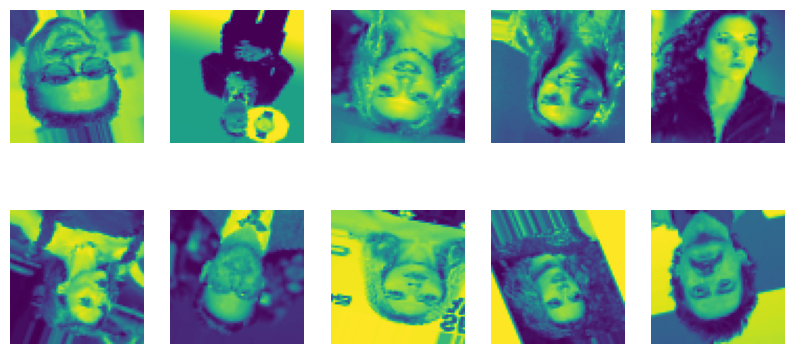

In [166]:
import matplotlib.pyplot as plt

# Generate a batch of augmented images
augmented_images, _ = train_datagen.next()

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()


In [167]:
for i in range(len(y_train)):
    if y_train[i]=='perry':
        y_train[i]=1
    else:
        y_train[i]=0
for i in range(len(y_val)):
    if y_val[i]=='perry':
        y_val[i]=1
    else:
        y_val[i]=0

In [168]:
y_val

array(['0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0'], dtype='<U8')

In [169]:
import numpy as np
y_train = y_train.astype(np.float32)
y_val=y_val.astype(np.float32)

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # first convolutional layer (inputs are 56x56 RGB images)
        tf.keras.layers.Conv2D(filters=24, kernel_size=3, activation=tf.nn.relu, input_shape=(64,64,1), data_format='channels_last'), 

        # first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

        # second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=3, activation=tf.nn.relu),

        # second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # third convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=3, activation=tf.nn.relu),

        # third max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # last dense layer to output the classification probabilities
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
    
    return cnn_model
  
model = build_cnn_model()

# initialize the model by passing some data through
model.predict(X_train[[0]])

# summary of the layers in the model
print(model.summary())

In [214]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1

model = Sequential()

model.add(Conv2D(24, (3, 3), activation='relu', input_shape=X_train.shape[1:], padding='same', kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(36, (3, 3), activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(36, (3, 3), activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu', padding='same', kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((3, 3)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.009)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
6/6 [==============================] - 2s 101ms/step - loss: 27.4979 - accuracy: 0.5729 - val_loss: 13.1407 - val_accuracy: 0.7292
Epoch 2/50
6/6 [==============================] - 0s 61ms/step - loss: 10.0479 - accuracy: 0.6562 - val_loss: 7.1052 - val_accuracy: 0.7292
Epoch 3/50
6/6 [==============================] - 0s 57ms/step - loss: 6.7673 - accuracy: 0.6562 - val_loss: 5.9662 - val_accuracy: 0.7292
Epoch 4/50
6/6 [==============================] - 0s 53ms/step - loss: 4.9346 - accuracy: 0.6562 - val_loss: 3.6442 - val_accuracy: 0.7292
Epoch 5/50
6/6 [==============================] - 0s 55ms/step - loss: 3.4817 - accuracy: 0.6562 - val_loss: 3.0879 - val_accuracy: 0.7292
Epoch 6/50
6/6 [==============================] - 0s 54ms/step - loss: 2.7749 - accuracy: 0.6562 - val_loss: 2.4851 - val_accuracy: 0.7292
Epoch 7/50
6/6 [==============================] - 0s 54ms/step - loss: 2.3636 - accuracy: 0.6562 - val_loss: 2.1348 - val_accuracy: 0.7292
Epoch 8/50
6/6 [=======

In [215]:
loss, accuracy = model.evaluate(X_val, y_val)

2/2 [==============================] - 1s 187ms/step - loss: 1.6927 - accuracy: 0.6500


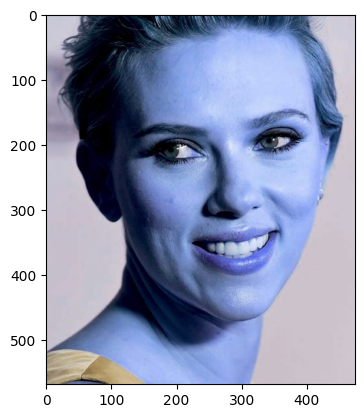

In [219]:
path='archive (5)/Scarlett Johansson/009_fc574624.jpg'
imag=cv2.imread(path)
plt.imshow(imag)

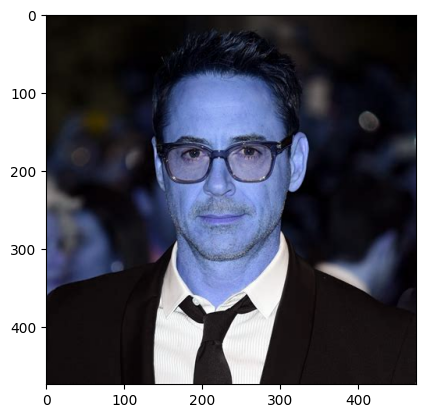

In [217]:
path='archive (5)/Robert Downey Jr/009_49237aa0.jpg'
imag=cv2.imread(path)
plt.imshow(imag)

In [220]:

imag=cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
imag = cv2.resize(resized_image, (64, 64)) 
imag = imag.astype(np.float32) / 255.0 
imag = np.expand_dims(imag, axis=0)

print(imag.shape)

model.predict(imag)
ans=model.predict(imag)
print(ans)
threshold = 0.5
predicted_label = 1 if ans >= threshold else 0
if predicted_label==1:
    print("perry")
else:
    print('platypus')


(1, 64, 64)
1/1 [==============================] - 0s 49ms/step
[[0.33417064]]
platypus
